[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RVCCF035\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


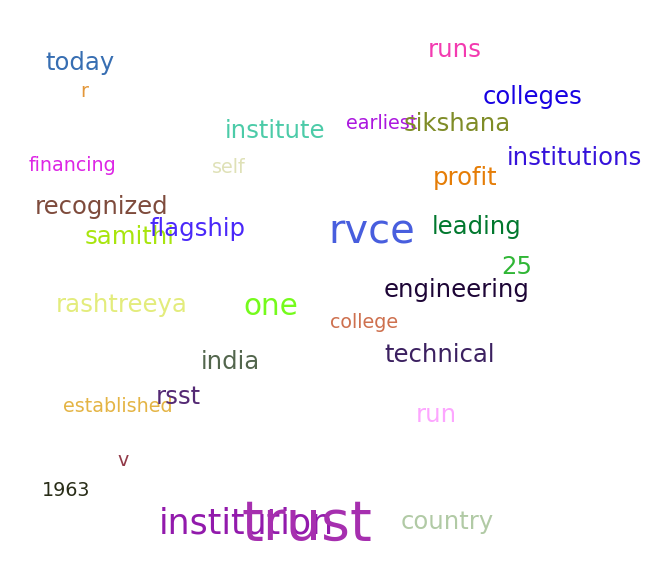

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import random
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def tokenize_and_lowercase(text):     
    tokens = re.findall(r'\b\w+\b', text)
    tokens = [token.lower() for token in tokens]
    return tokens

                  
def calculate_word_frequency(tokens):
    word_frequency = {}
    for token in tokens:
        if token in word_frequency:
            word_frequency[token] += 1
        else:
            word_frequency[token] = 1
    return word_frequency
def scale_frequencies(word_frequency):
    max_frequency = max(word_frequency.values())
    scaled_frequency = {word: freq / max_frequency for word, freq in word_frequency.items()}
    return scaled_frequency

def visualize_word_cloud(scaled_frequency):
    canvas_size = 700
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_xlim([0, canvas_size])
    ax.set_ylim([0, canvas_size])

    placed_words = set()
    used_coordinates = set()

    for word, frequency in scaled_frequency.items():
        word_size = int(frequency * 200)
        margin = 5
        box_width = word_size + margin
        box_height = word_size + margin

        overlap = True
        while overlap:
            start_x = random.randint(margin, canvas_size - box_width - margin)
            start_y = random.randint(margin, canvas_size - box_height - margin)
            overlap = any(
                start_x < x + w and start_x + box_width > x and
                start_y < y + h and start_y + box_height > y
                for (x, y, w, h) in placed_words
            )
            
            if (start_x, start_y) in used_coordinates:
                overlap = True
            else:
                used_coordinates.add((start_x, start_y))
        placed_words.add((start_x, start_y, box_width, box_height))

        rect = Rectangle((start_x, start_y), box_width, box_height, fill=False, edgecolor='white')
        ax.add_patch(rect)

        col = np.random.rand(3)

        plt.text(start_x + margin / 2, start_y + margin / 2, word, fontsize=10 + frequency * 30, color=col)

    plt.axis("off")
    plt.show()
    
corpus="R.V. College of Engineering (RVCE) established in 1963 is one of the earliest self-financing engineering colleges in the country. The institution is run by Rashtreeya Sikshana Samithi Trust (RSST) a not for profit trust. The trust runs over 25 institutions and RVCE is the flagship institute under the trust. RVCE is today recognized as one of India’s leading technical institution.colleges in the country. The institution is run by Rashtreeya Sikshana Samithi Trust (RSST) a not for profit trust. The trust runs over 25 institutions and RVCE is the flagship institute under the trust. RVCE is today recognized as one of India’s leading technical institution."



tokens = tokenize_and_lowercase(corpus)
stops = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token not in stops]

word_frequency = calculate_word_frequency(filtered_tokens) 
scaled_frequency = scale_frequencies(word_frequency)
visualize_word_cloud(scaled_frequency)
